In [1]:
import mdtraj as md

In [2]:
from pathlib import Path

In [3]:
!pwd

/home/crystal/Desktop/L-ile


In [4]:
traj = md.load_dcd('L_prd.dcd', top='L_clean.pdb')

In [5]:
traj

<mdtraj.Trajectory with 2000000 frames, 41 atoms, 2 residues, and unitcells at 0x7fa758909d20>

In [6]:
traj = md.Trajectory.superpose(traj, traj[0], frame=0, atom_indices=None, ref_atom_indices=None, parallel=True)

In [7]:
md.rmsd(traj, traj[0], frame=0, atom_indices=None, parallel=True, precentered=False)

array([0.        , 0.04281989, 0.04737452, ..., 0.26868793, 0.2681263 ,
       0.2753408 ], dtype=float32)

In [8]:
md.rmsf(traj, traj[0], frame=0, atom_indices=None, parallel=True, precentered=False)

array([0.05384397, 0.06321211, 0.1094731 , 0.04955914, 0.1269395 ,
       0.1363415 , 0.1895049 , 0.18929483, 0.18998979, 0.08849755,
       0.15687875, 0.170402  , 0.14835519, 0.20519382, 0.20525609,
       0.20449805, 0.0947405 , 0.13489348, 0.18188122, 0.18167919,
       0.18222532, 0.04882568, 0.07909845, 0.12653053, 0.05756609,
       0.08447167, 0.04458304, 0.10810561, 0.13084123, 0.18516791,
       0.18379433, 0.18401012, 0.08719624, 0.1578919 , 0.1596935 ,
       0.11316854, 0.16885492, 0.17025334, 0.16787761, 0.19236909,
       0.18843426], dtype=float32)

In [9]:
md.compute_phi(traj)

(array([[ 0, 21, 24, 23]]),
 array([[-2.1284435],
        [-2.1462746],
        [-2.0160308],
        ...,
        [-1.5935591],
        [-1.0255879],
        [-1.3776194]], dtype=float32))

In [10]:
md.compute_psi(traj)

(array([[17,  1,  0, 21]]),
 array([[ 2.0694518],
        [ 1.971041 ],
        [ 1.906835 ],
        ...,
        [-1.1644721],
        [-1.3852625],
        [-1.2261732]], dtype=float32))

In [11]:
psi_indices, phi_indices = [17,  1,  0, 21], [ 0, 21, 24, 23]
angles = md.compute_dihedrals(traj, [phi_indices, psi_indices])
print(angles)

[[-2.1284435  2.0694518]
 [-2.1462746  1.971041 ]
 [-2.0160308  1.906835 ]
 ...
 [-1.5935591 -1.1644721]
 [-1.0255879 -1.3852625]
 [-1.3776194 -1.2261732]]


(-3.141592653589793, 3.141592653589793)

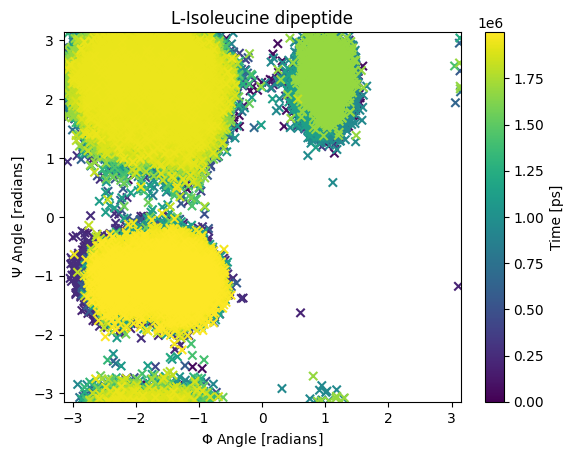

In [72]:
from pylab import *
from math import pi

figure()
title('L-Isoleucine dipeptide')
scatter(angles[:, 0], angles[:, 1], marker='x', c=traj.time)
cbar = colorbar()
cbar.set_label('Time [ps]')
xlabel(r'$\Phi$ Angle [radians]')
xlim(-pi, pi)
ylabel(r'$\Psi$ Angle [radians]')
ylim(-pi, pi)

In [31]:
ax.hist2d(angles[:, 0]*180/math.pi, angles[:, 1]*180/math.pi, bins=60, range=[[-180,180],[-180,180]], norm = "log")

(array([[ 0.,  0.,  0., ...,  2.,  0.,  1.],
        [ 0.,  0.,  0., ..., 16.,  7.,  4.],
        [ 5.,  0.,  1., ..., 52., 27.,  7.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1.,  1.]]),
 array([-180., -174., -168., -162., -156., -150., -144., -138., -132.,
        -126., -120., -114., -108., -102.,  -96.,  -90.,  -84.,  -78.,
         -72.,  -66.,  -60.,  -54.,  -48.,  -42.,  -36.,  -30.,  -24.,
         -18.,  -12.,   -6.,    0.,    6.,   12.,   18.,   24.,   30.,
          36.,   42.,   48.,   54.,   60.,   66.,   72.,   78.,   84.,
          90.,   96.,  102.,  108.,  114.,  120.,  126.,  132.,  138.,
         144.,  150.,  156.,  162.,  168.,  174.,  180.]),
 array([-180., -174., -168., -162., -156., -150., -144., -138., -132.,
        -126., -120., -114., -108., -102.,  -96.,  -90.,  -84.,  -78.,
         -72.,  -66.,  -60.,  -54.,  -48.,  -42.,  -36.,  -30.,  -24.,
         -18.,  -

In [44]:
def negative_log(x):
    return -np.log(x)

def inverse_negative_log(x):
    return -np.exp(x)


In [45]:
norm = mpl.colors.FuncNorm((negative_log,inverse_negative_log), vmin=angles.min(), vmax=angles.max())

In [49]:
hist

In [51]:
h

array([[ 1.38155106e+01,  1.38155106e+01,  1.38155106e+01, ...,
        -6.93147681e-01,  1.38155106e+01, -9.99999500e-07],
       [ 1.38155106e+01,  1.38155106e+01,  1.38155106e+01, ...,
        -2.77258878e+00, -1.94591029e+00, -1.38629461e+00],
       [-1.60943811e+00,  1.38155106e+01, -9.99999500e-07, ...,
        -3.95124374e+00, -3.29583690e+00, -1.94591029e+00],
       ...,
       [ 1.38155106e+01,  1.38155106e+01,  1.38155106e+01, ...,
         1.38155106e+01,  1.38155106e+01,  1.38155106e+01],
       [ 1.38155106e+01,  1.38155106e+01,  1.38155106e+01, ...,
         1.38155106e+01,  1.38155106e+01,  1.38155106e+01],
       [ 1.38155106e+01,  1.38155106e+01,  1.38155106e+01, ...,
         1.38155106e+01, -9.99999500e-07, -9.99999500e-07]])

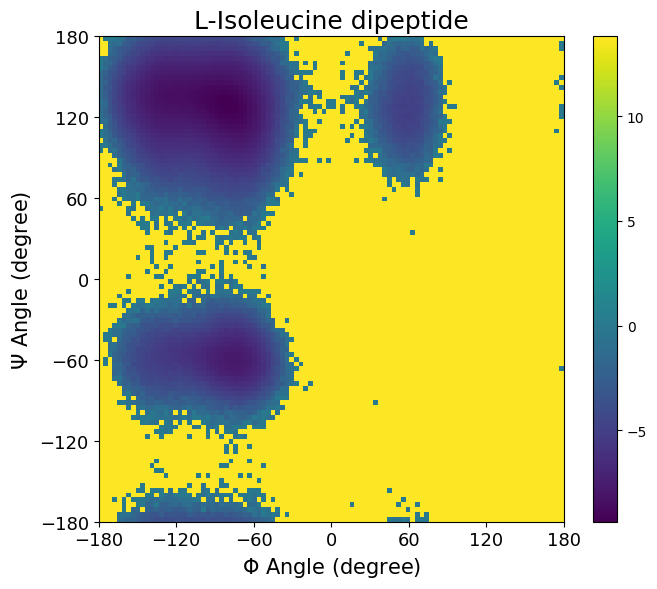

In [71]:
fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)
h,xedge,yedge,hist = ax.hist2d(angles[:, 0]*180/math.pi, angles[:, 1]*180/math.pi, bins=100, range=[[-180,180],[-180,180]])
h = -np.log(h+1e-6)
X,Y = np.meshgrid(xedge,yedge)
im = ax.pcolormesh(X,Y, h.T)

cbar = fig.colorbar(im)
                       
ax.set_xlim([-180, 180])
ax.set_ylim([-180, 180])
ax.set_xlabel(r'$\Phi$ Angle (degree)', fontsize =15)
ax.set_ylabel(r'$\Psi$ Angle (degree)', fontsize =15)
ax.set_title('L-Isoleucine dipeptide', fontsize =18)
ax.xaxis.set_ticks([-180,-120,-60,0,60,120,180])
ax.yaxis.set_ticks([-180,-120,-60,0,60,120,180])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('L-Isoleucine dipeptide_freeenergy1.png', dpi=600)
plt.show()

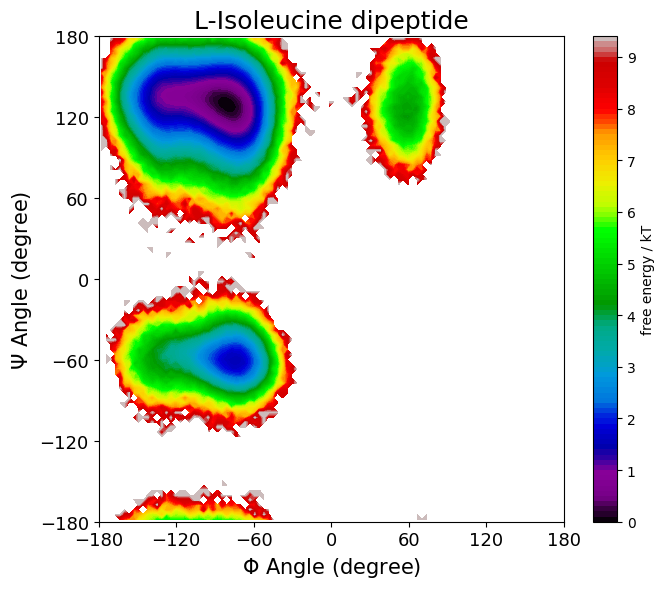

In [69]:
import pyemma as pm

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)
fes = pm.plots.plot_free_energy(angles[:, 0]*180/math.pi, angles[:, 1]*180/math.pi, nbins=100, ax=ax)
ax.set_xlim([-180, 180])
ax.set_ylim([-180, 180])
ax.set_xlabel(r'$\Phi$ Angle (degree)', fontsize =15)
ax.set_ylabel(r'$\Psi$ Angle (degree)', fontsize =15)
ax.set_title('L-Isoleucine dipeptide', fontsize =18)
ax.xaxis.set_ticks([-180,-120,-60,0,60,120,180])
ax.yaxis.set_ticks([-180,-120,-60,0,60,120,180])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('L-Isoleucine dipeptide_freeenergy.png', dpi=600)
plt.show()

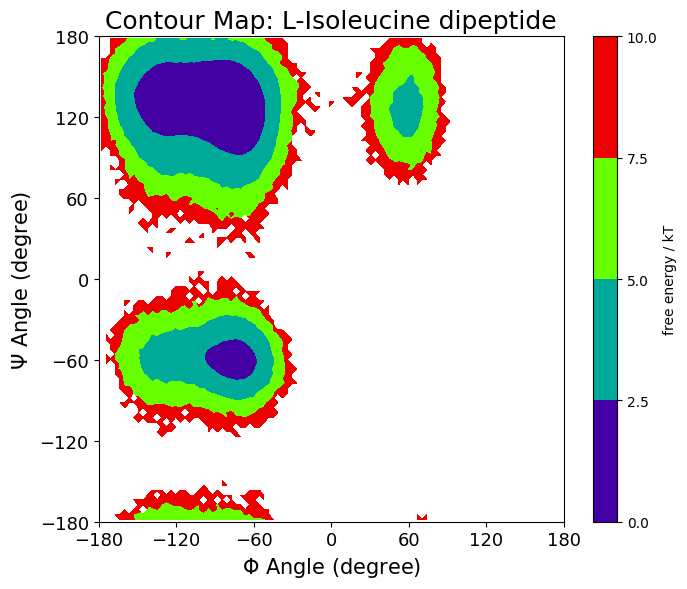

In [70]:
fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)
fes = pm.plots.plot_free_energy(angles[:, 0]*180/math.pi, angles[:, 1]*180/math.pi, nbins=100, ncontours=3, ax=ax)
ax.set_xlim([-180, 180])
ax.set_ylim([-180, 180])
ax.set_xlabel(r'$\Phi$ Angle (degree)', fontsize =15)
ax.set_ylabel(r'$\Psi$ Angle (degree)', fontsize =15)
ax.set_title('Contour Map: L-Isoleucine dipeptide', fontsize =18)
ax.xaxis.set_ticks([-180,-120,-60,0,60,120,180])
ax.yaxis.set_ticks([-180,-120,-60,0,60,120,180])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('L-Isoleucine dipeptide_contour.png', dpi=600)
plt.show()

In [15]:
int(angles.shape[0]/100)

20000

In [16]:
np.arange(0, int(angles.shape[0]/100)+1, 10)

array([    0,    10,    20, ..., 19980, 19990, 20000])

In [17]:
np.arange(0, int(angles.shape[0]/100)+1, 100).shape

(201,)

In [18]:
np.arange(0, int(angles.shape[0])+1, 10000).shape

(201,)

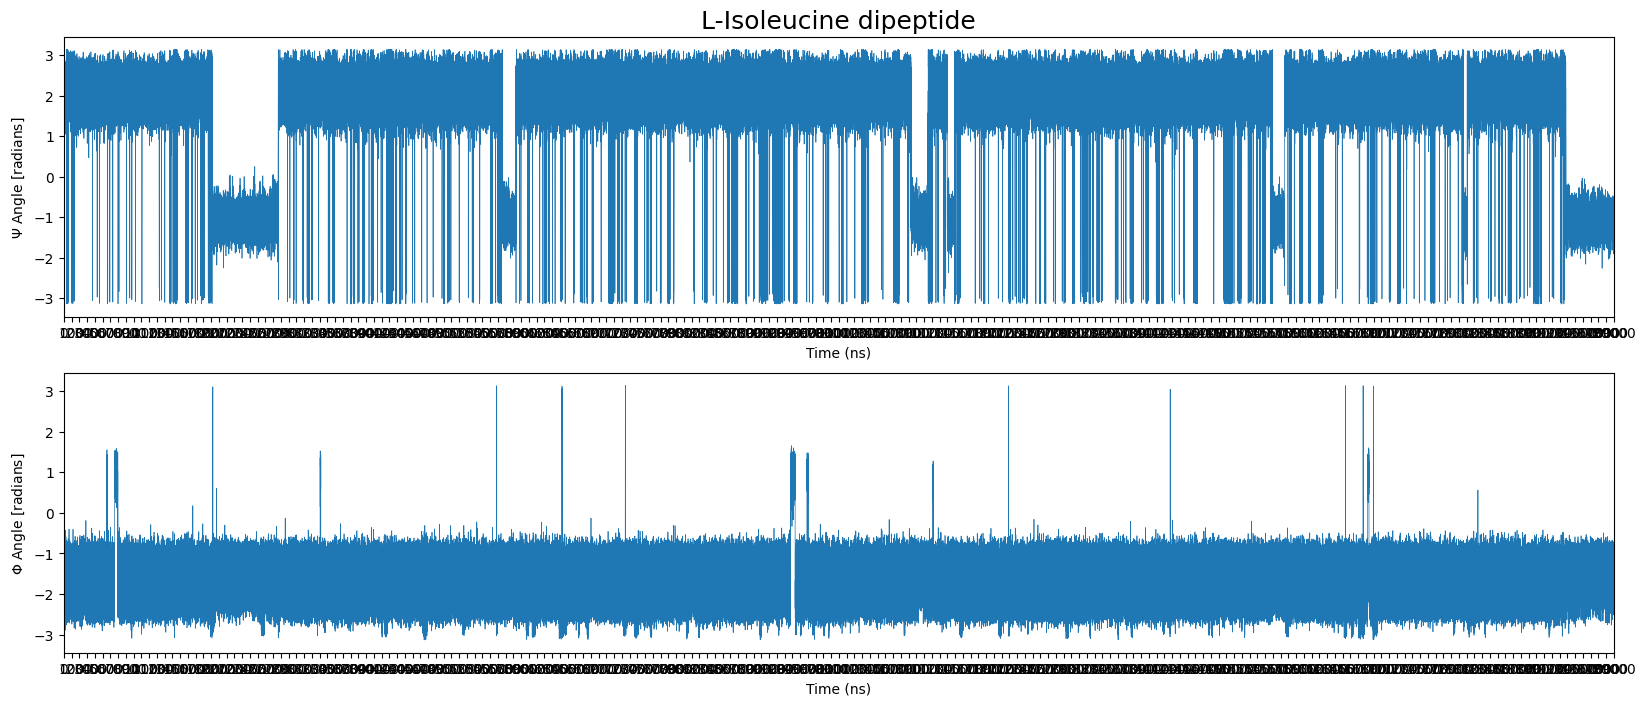

In [19]:
from pylab import *
from math import pi
psi = angles[:, 1].flatten()
phi = angles[:, 0].flatten()

fig, axes = plt.subplots(2,1, figsize=(20,8))

axes[0].plot(psi, lw=0.5)
axes[1].plot(phi, lw=0.5)
axes[0].set_title('L-Isoleucine dipeptide', fontsize =18)
axes[0].set_ylabel(r'$\Psi$ Angle [radians]')
axes[1].set_ylabel(r'$\Phi$ Angle [radians]')
axes[1].set_xlabel('Time (ns)')
axes[0].set_xlabel('Time (ns)')

for ax in axes:
    ax.set_xticks(ticks=np.arange(0, int(angles.shape[0])+1, 10000), labels=np.arange(0, int(angles.shape[0]/100)+1, 100))
    ax.set_xlim([0, angles.shape[0]])

In [20]:
def find_transitions(s1_mask, s2_mask):
    s2s1_transition_ids, s1s2_transition_ids = [], []
    for i in tqdm(range(1, len(s1_mask)), desc=f'Finding transitions'):
        s1_ids = [k for k, x in enumerate(s1_mask[:i]) if x]
        s2_ids = [k for k, x in enumerate(s2_mask[:i]) if x]
        if len(s1_ids) == 0 or len(s2_ids) == 0:
            continue
        if s1_mask[i] and (s1_ids[-1] < s2_ids[-1]):
            s2s1_transition_ids.append([s2_ids[-1], i])
            with open('s2s1.txt', 'a') as f:
                # Write the list of strings to the file
                f.writelines(str(s2_ids[-1]) + ' ' + str(i) + '\n')
        if s2_mask[i] and (s1_ids[-1] > s2_ids[-1]):
            s1s2_transition_ids.append([s1_ids[-1], i])
            with open('s1s2.txt', 'a') as f:
                # Write the list of strings to the file
                f.writelines(str(s1_ids[-1]) + ' ' + str(i) + '\n')
    return s2s1_transition_ids, s1s2_transition_ids

In [21]:
def save_transitions(traj, s2s1_transition_ids, s1s2_transition_ids):
    if len(s2s1_transition_ids)>0:
        for no, ids in enumerate(s2s1_transition_ids):
            transition_traj = traj[ids[0]:ids[1]+1]
            transition_traj.superpose(transition_traj[0])
            transition_traj.save_pdb(md_transition_path.joinpath(f'traj_s2s1slowest{no}.pdb'))
    if len(s1s2_transition_ids)>0:
        for no, ids in enumerate(s1s2_transition_ids):
            transition_traj = traj[ids[0]:ids[1]+1]
            transition_traj.superpose(transition_traj[0])
            transition_traj.save_pdb(md_transition_path.joinpath(f'traj_s1s2slowest{no}.pdb'))
    return None

In [22]:
from tqdm import tqdm

In [23]:
from pathlib import Path

In [24]:
md_transition_path = Path('./')

find_transitions(phi>0.5, phi<-1.5)

s2s1_transition_ids = [[65617, 65629],
[192297, 192298],
[197144, 197167],
[330689, 330695],
[558617, 558618],
[642900, 642901],
[643078, 643079],
[724613, 724614],
[937919, 937932],
[959038, 959043],
[960133, 960143],
[1120780, 1120797],
[1219126, 1219127],
[1427649, 1427650],
[1653808, 1653809],
[1676583, 1676584],
[1682413, 1682430],
[1689970, 1689971],
[1824687, 1824694]]
s1s2_transition_ids =  [[56192, 56211],
[69685, 69695],
[192298, 192299],
[197167, 197172],
[331665, 331675],
[558618, 558619],
[642901, 642902],
[643079, 643080],
[724614, 724615],
[943685, 943693],
[959296, 959303],
[960879, 960887],
[1121970, 1121985],
[1219127, 1219128],
[1427650, 1427651],
[1653809, 1653810],
[1676584, 1676585],
[1684091, 1684097],
[1689971, 1689972],
[1824694, 1824697]]
save_transitions(traj, s2s1_transition_ids, s1s2_transition_ids)

traj0 = md.load_pdb('traj_s1s2slowest1.pdb')

md.compute_phi(traj0)